In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('dataset/data_bersih.csv')
print(df)

              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.000000       3.0       1.50         1340      7912     1.5   
1     342000.000000       3.0       2.00         1930     11947     1.0   
2     420000.000000       3.0       2.25         2000      8030     1.0   
3     550000.000000       4.0       2.50         1940     10500     1.0   
4     490000.000000       2.0       1.00          880      6380     1.0   
...             ...       ...        ...          ...       ...     ...   
3311  308166.666667       3.0       1.75         1510      6360     1.0   
3312  534333.333333       3.0       2.50         1460      7573     2.0   
3313  416904.166667       3.0       2.50         3010      7014     2.0   
3314  203400.000000       4.0       2.00         2090      6630     1.0   
3315  220600.000000       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3316 entries, 0 to 3315
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3316 non-null   float64
 1   bedrooms       3316 non-null   float64
 2   bathrooms      3316 non-null   float64
 3   sqft_living    3316 non-null   int64  
 4   sqft_lot       3316 non-null   int64  
 5   floors         3316 non-null   float64
 6   waterfront     3316 non-null   int64  
 7   view           3316 non-null   int64  
 8   condition      3316 non-null   int64  
 9   sqft_above     3316 non-null   int64  
 10  sqft_basement  3316 non-null   int64  
 11  yr_built       3316 non-null   int64  
 12  yr_renovated   3316 non-null   int64  
 13  city           3316 non-null   int64  
 14  statezip       3316 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 388.7 KB


In [ ]:
# %%
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).drop(columns=[df.columns[-1]])
X = pd.concat([x_numerical, x_categorical], axis=1)
y = df[df.columns[-1]]

In [ ]:

# Split Data Latih dan Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
# %%
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis')
plt.title("Sebaran 2 Fitur Pertama pada Data Latih")
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.colorbar(label='Target')
plt.show()


Out-of-Bag Score: 0.8744623814789636
Mean Squared Error: 9.424004825090402e-07
R-squared: 0.9999977521633462


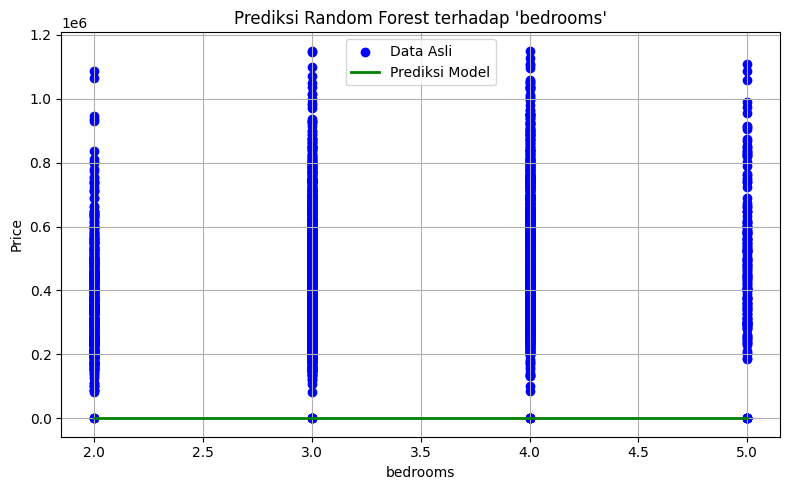

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Pilih fitur yang ingin divisualisasikan
feature_name = 'bedrooms'

# Ambil semua fitur sebagai array
X_full = x  # semua fitur yang digunakan saat training
feature_index = df.columns.get_loc(feature_name)  # posisi kolom fitur

# Buat grid nilai fitur yang ingin divisualisasikan
X_vals = np.arange(df[feature_name].min(), df[feature_name].max() + 1, 1)

# Buat array prediksi dengan fitur lain dijadikan rata-rata
X_base = np.mean(X_full, axis=0)
X_grid = np.array([X_base.copy() for _ in X_vals])
for i, val in enumerate(X_vals):
    X_grid[i][feature_index - 1] = val  # -1 karena kolom target 'price' dihapus

# Prediksi dan visualisasi
y_pred_grid = regressor.predict(X_grid)

plt.figure(figsize=(8, 5))
plt.scatter(df[feature_name], df['price'], color='blue', label="Data Asli")
plt.plot(X_vals, y_pred_grid, color='green', linewidth=2, label="Prediksi Model")
plt.title(f"Prediksi Random Forest terhadap '{feature_name}'")
plt.xlabel(feature_name)
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


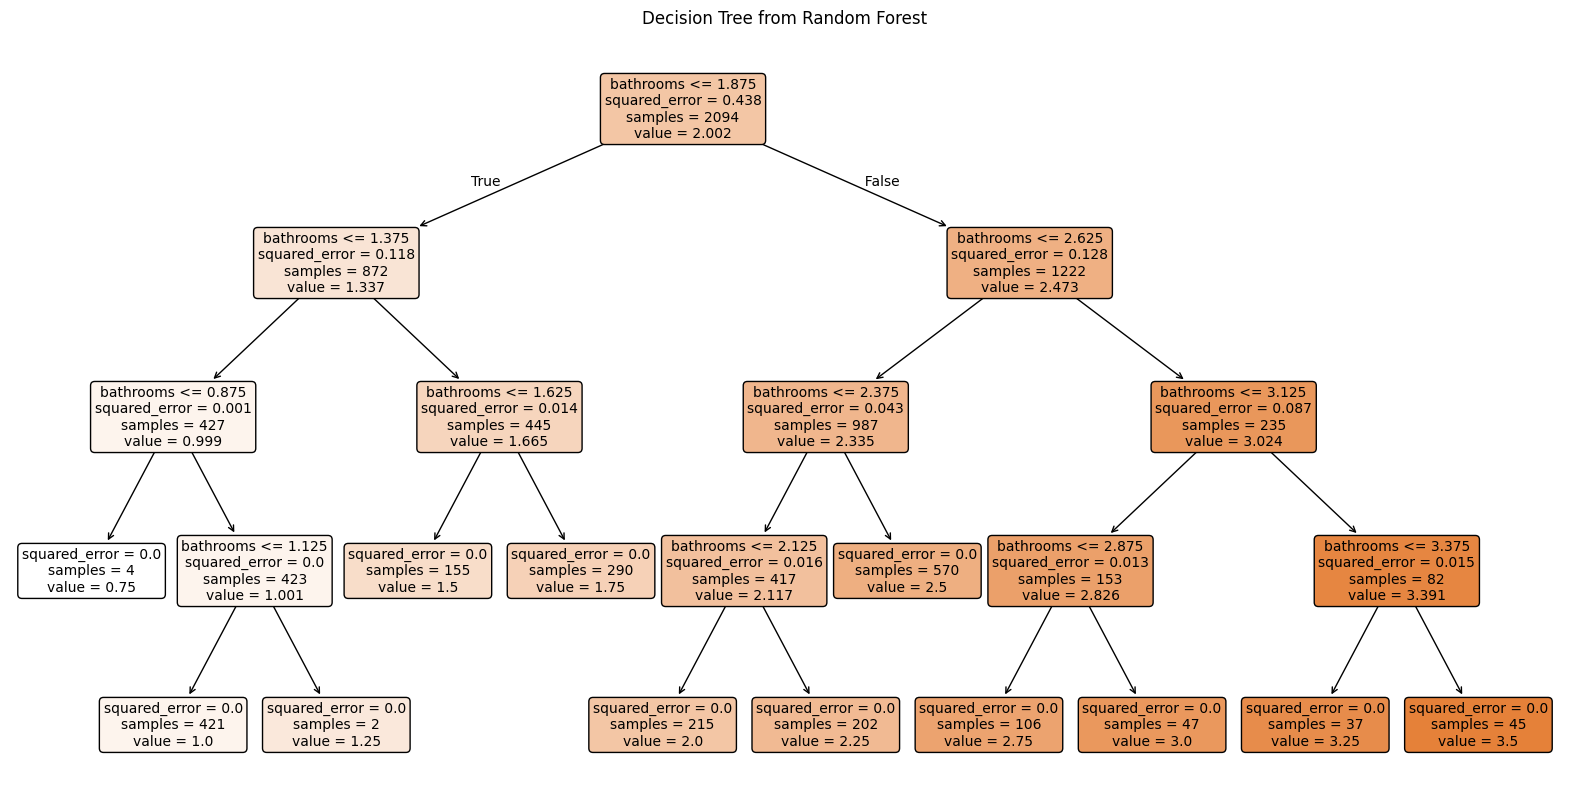

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()